In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
plt.rcParams['figure.figsize'] = [20, 20] # Set Matplotlib size

# 1. Explore the data

## 1.1 Label Distribution

In [3]:
labels_df = pd.read_csv('labels\\labels.csv',header=0)

In [4]:
labels_df.head()

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


In [75]:
labels_df['bookingID'].value_counts()

1391569403991    2
154618822837     2
481036337234     2
919123001348     2
1511828488211    2
970662608932     2
1649267441751    2
515396075694     2
695784702084     2
403726925929     2
1632087572573    2
13               2
395136991308     2
1279900254294    2
1408749273124    2
455266533495     2
1348619731077    2
223338299461     2
901943132350     1
231928234067     1
858993459281     1
1005022347345    1
798863917147     1
1683627180101    1
206158430291     1
1649267441719    1
755914244139     1
42949673034      1
1340029796368    1
197568495699     1
                ..
111669149807     1
163208757398     1
678604832948     1
1090921693350    1
1675037245473    1
1013612281980    1
180388626477     1
1340029796411    1
1073741824021    1
137438953591     1
1005022347302    1
962072674335     1
1503238553762    1
893353197738     1
231928234139     1
549755814000     1
893353197606     1
1236950581270    1
1331439861819    1
1099511627842    1
1494648619170    1
979252543519

We have duplicate rows. Let's see how the duplicate rows are labelled.

In [76]:
labels_df[labels_df['bookingID']==1632087572573]

,bookingID,label
1059,1632087572573,1
14432,1632087572573,0


In [77]:
labels_df.drop_duplicates(subset=['bookingID'], keep=False, inplace=True)

In [78]:
labels_df['label'].value_counts()

0    14999
1     4983
Name: label, dtype: int64

## 1.2 Features Distribution

In [6]:
feat_df = pd.read_csv('features\\features.csv',header=0)

In [7]:
feat_df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA6447FE80>,
      dtype=object)

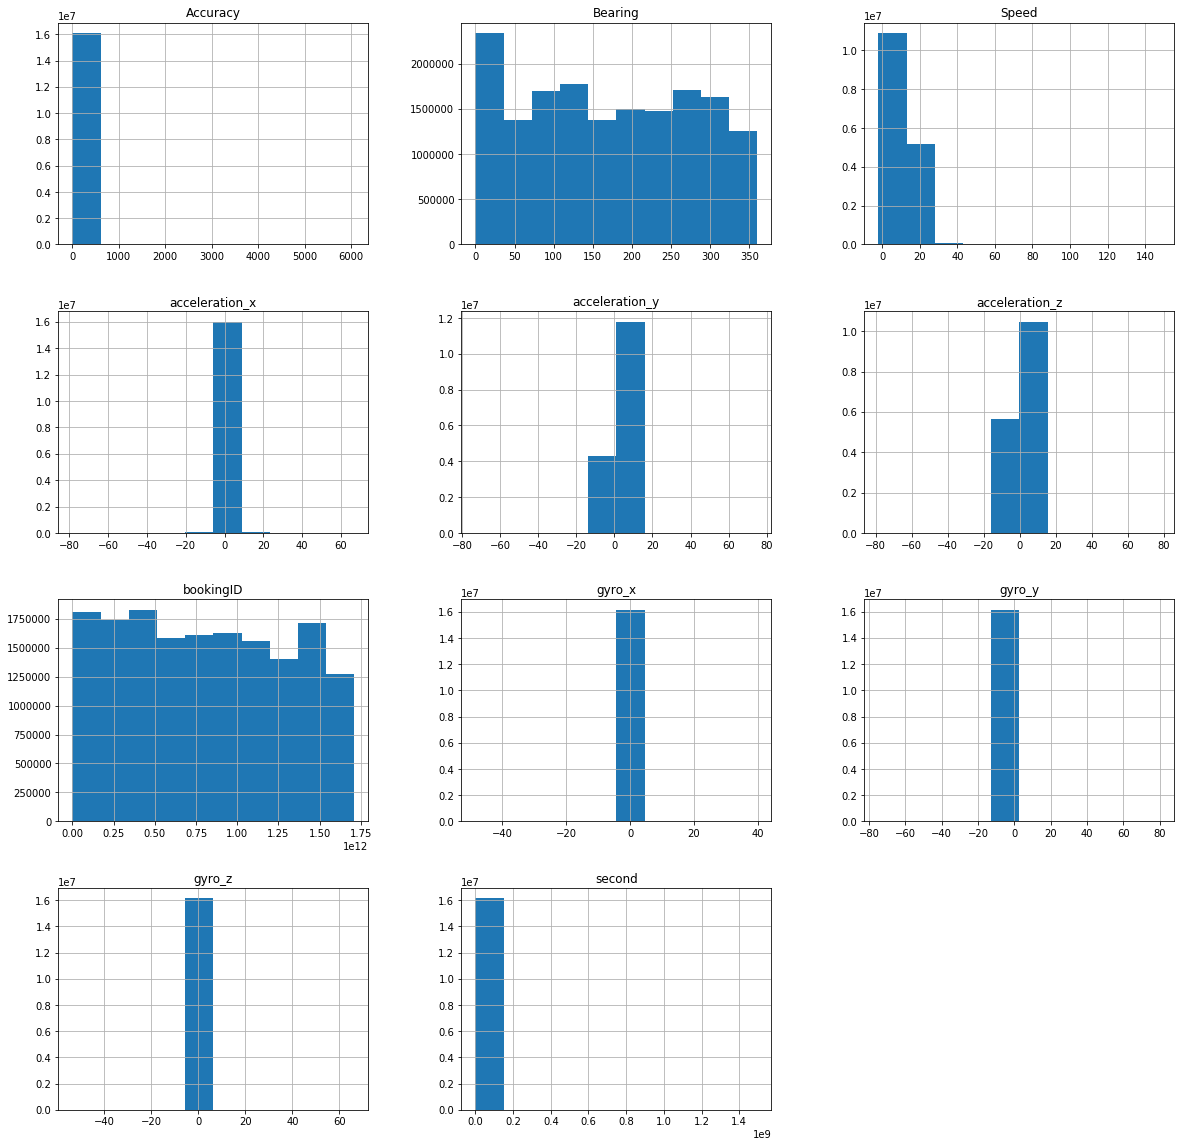

In [8]:
feat_df.hist()

First observations:

* Seconds has a very wide range, there might be some erroneous data
* Speed seems to be very large as well (30 m/s = 108 km/h)

In [9]:
max(feat_df['second'])

1495796757.0

In [10]:
max(feat_df['Speed'])

148.01863

### 1.1.1 Check Seconds variable

Try seeing how many exceed 1e4 (which is 2h 40 min). If they are the same, then we can try cleaning the data by discarding those which exceed

In [11]:
np.sum(feat_df['second']>1e4), np.sum(feat_df['second']>1e5), np.sum(feat_df['second']>1e6)

(82, 82, 82)

In [12]:
feat_df[feat_df['second']>1e4]

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
88251,858993459333,33.727,0.0,-0.507571,9.758766,1.350330,-0.055894,0.140804,0.113315,6.193154e+08,-1.0
91569,1460288880770,5.994,0.0,-0.114922,9.270349,0.804452,-0.202807,-0.043982,-0.012217,6.193165e+08,-1.0
150076,1460288880770,5.297,0.0,0.651223,9.385271,1.455675,0.106291,-0.467923,-0.046426,6.193165e+08,-1.0
233462,858993459333,16.491,0.0,0.488417,9.806650,-0.402226,-0.039706,0.034514,0.038790,6.193155e+08,-1.0
267319,858993459333,25.836,0.0,1.005565,9.241618,0.411803,-0.176540,-0.076358,-0.007330,6.193157e+08,-1.0
559691,858993459333,19.012,0.0,0.814029,8.523358,3.667917,-0.030238,0.101709,0.044288,6.193158e+08,-1.0
638678,858993459333,21.636,0.0,0.229843,9.911995,1.570596,-0.008858,-0.033598,0.011301,6.193158e+08,-1.0
737191,858993459333,24.706,0.0,0.689530,10.400413,1.446098,0.028711,-0.088270,-0.007636,6.193158e+08,-1.0
856931,858993459333,28.341,0.0,-0.009577,9.777920,1.302446,-0.056505,0.029322,0.036652,6.193156e+08,-1.0
898132,858993459333,31.185,0.0,0.172383,9.672575,1.187524,-0.060781,0.015272,0.020464,6.193156e+08,-1.0


We are quite sure that these rows have issues with the seconds variable. As we want to construct a time series, we discard these rows as we are unsure where they will be in the sequence.

In [13]:
feat_df = feat_df[feat_df['second']<1e4]

### 1.1.2 Check Speed

In [14]:
feat_df[feat_df['Speed']>50]

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
1411481,738734374968,22.512,247.00000,-2.307648,9.837494,1.906753,-0.242294,0.635406,-0.332550,639.0,50.550000
6864727,1297080123464,48.000,293.00000,-0.193930,9.691729,0.761356,0.100182,-0.076969,-0.057421,634.0,88.037254
9137029,953482739877,32.000,307.00000,0.622511,9.380769,-0.418998,0.113717,0.003925,-0.032686,819.0,56.698967
10476836,1297080123464,12.000,157.00000,-0.694319,9.174581,1.282095,0.130725,-0.147829,-0.047647,633.0,72.456825
15324095,317827580025,32.000,285.92395,0.342371,9.309854,-0.204704,0.031958,-0.111853,-0.008522,271.0,148.018630


In [15]:
feat_df.query('bookingID == 317827580025 & second > 265').sort_values('second').head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
4734257,317827580025,32.0,116.034874,2.428918,10.206482,0.746991,0.003196,-0.057524,-0.003196,270.0,5.033003
15324095,317827580025,32.0,285.923950,0.342371,9.309854,-0.204704,0.031958,-0.111853,-0.008522,271.0,148.018630
13619635,317827580025,48.0,232.346970,0.495600,10.126276,0.011971,-0.009587,-0.082025,-0.013848,274.0,29.348158
4308451,317827580025,32.0,211.122500,0.847547,10.228029,-0.542287,0.014914,-0.044741,0.030893,275.0,17.285380
9251893,317827580025,32.0,233.130650,1.124078,9.024943,-1.625663,-0.039415,-0.039415,0.036219,276.0,11.056324


In [16]:
feat_df.query('bookingID == 738734374968 & second > 635').sort_values('second').head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
14477106,738734374968,64.319,0.0,-1.765671,9.034698,1.674652,-0.213257,0.611313,-0.343475,637.0,-1.00
1411481,738734374968,22.512,247.0,-2.307648,9.837494,1.906753,-0.242294,0.635406,-0.332550,639.0,50.55
9841796,738734374968,18.224,260.0,-2.391983,9.725021,3.860489,-0.238235,0.613678,-0.311447,640.0,48.41
2311799,738734374968,16.079,259.0,-2.880722,9.339188,2.087402,-0.227478,0.647766,-0.360519,641.0,43.10
14471862,738734374968,16.079,258.0,-2.448212,9.561127,2.171158,-0.260849,0.635391,-0.326004,642.0,38.76


In [17]:
feat_df.query('bookingID == 1297080123464 & second > 630').sort_values('second').head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
15613351,1297080123464,22.731,247.0,-0.392649,9.923966,-0.022745,0.024435,-0.109956,-0.031765,632.0,3.711382
10476836,1297080123464,12.000,157.0,-0.694319,9.174581,1.282095,0.130725,-0.147829,-0.047647,633.0,72.456825
6864727,1297080123464,48.000,293.0,-0.193930,9.691729,0.761356,0.100182,-0.076969,-0.057421,634.0,88.037254
2036700,1297080123464,24.000,231.0,-0.284910,9.706094,0.624887,-0.003665,-0.064752,-0.040317,636.0,32.417366
5740432,1297080123464,16.000,254.0,-0.724246,9.404425,0.672771,-0.051313,-0.043982,-0.019548,637.0,15.001080


In [18]:
feat_df.query('bookingID == 953482739877& second > 790').sort_values('second').head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
2145810,953482739877,800.0,0.0,0.172388,10.498895,0.945739,-0.165449,0.129764,-0.032075,795.0,-1.000000
9137029,953482739877,32.0,307.0,0.622511,9.380769,-0.418998,0.113717,0.003925,-0.032686,819.0,56.698967
2608104,953482739877,16.0,307.0,-0.339987,10.599455,1.678387,-0.050606,0.018586,-0.053456,820.0,0.000000
4280592,953482739877,16.0,0.0,-0.464489,8.753469,-0.375901,-0.101919,-0.022342,0.000911,821.0,-1.000000
6264233,953482739877,16.0,0.0,-1.980065,8.315316,0.878699,-0.487375,-0.328385,0.074826,822.0,-1.000000


These speed values seem wrong, but unsure if we can discard. Try keeping first.

In [19]:
feat_df['bookingID'].value_counts()

438086664371     7561
1374389534819    4499
34359738469      4302
1108101562533    3925
747324309632     3674
1486058684448    3611
893353197656     3486
1211180777592    3206
1365799600208    3195
120259084461     3172
412316860458     3061
1116691497104    3055
1262720385148    3026
515396075652     2996
1194000908355    2981
953482739722     2929
695784702068     2917
1116691497088    2909
283467841668     2893
77309411460      2868
841813590038     2837
1709396983933    2835
841813590125     2828
841813590042     2815
1700807049324    2790
1065151889429    2788
1125281431586    2774
1159641169935    2755
670014898333     2712
1211180777501    2706
                 ... 
1589137899664     120
575525617679      120
1288490188981     120
515396075679      120
60129542207       120
1348619730958     120
764504178845      120
309237645388      120
25769803813       120
343597383756      120
1228360646706     120
103079215187      120
149               120
558345748556      120
8504035247

In [55]:
labels_df[labels_df['label']==1].sample().iloc[0]['bookingID']

188978561153

In [20]:
labels_df[labels_df['bookingID']==558345748483]

,bookingID,label
5279,558345748483,1


In [21]:
def plot_trip(df, bookingID):
    df[df['bookingID'] == bookingID].sort_values('second').plot(x='second', subplots=True, sharex=True, figsize=(16,16))
    plt.show()

In [58]:
def plot_random_trip(df, labels_df, label):
    id_ = labels_df[labels_df['label']==label].sample().iloc[0]['bookingID']
    print('Plotting for trip ' + str(id_))
    plot_trip(df, id_)

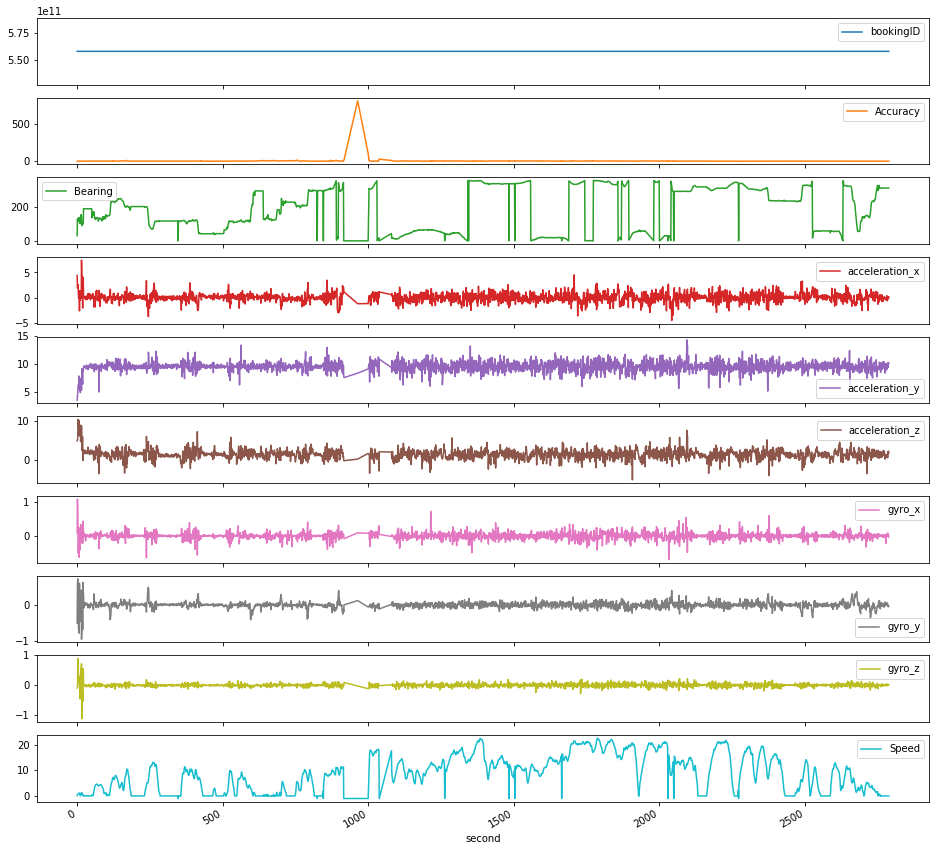

In [22]:
plot_trip(feat_df, 558345748483)

In [23]:
feat_df[feat_df['bookingID'] == 558345748483].sort_values('second')

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
1758524,558345748483,3.000,31.0,4.411316,3.604471,5.014656,0.089186,-0.509462,-0.095295,0.0,0.209735
9684337,558345748483,3.000,128.0,1.953669,4.274847,5.094861,1.098336,0.530231,-0.084299,1.0,0.402705
3773048,558345748483,3.000,115.0,2.070984,4.976348,5.760449,0.807564,0.728151,0.339641,2.0,0.675840
14627230,558345748483,3.000,122.0,2.603694,5.987898,10.402806,0.156382,-0.250455,0.896750,3.0,0.894677
12413098,558345748483,3.000,135.0,1.049858,6.356605,8.608353,-0.519235,-0.252898,0.469145,4.0,0.966395
7280454,558345748483,3.000,133.0,-0.027533,6.424841,8.850166,-0.029322,-0.690278,0.101404,5.0,1.001579
8146176,558345748483,3.000,125.0,0.499191,7.935582,7.858967,0.240681,0.069639,0.299324,6.0,1.016047
11037392,558345748483,3.000,139.0,0.240617,7.430405,10.081984,-0.638965,-0.788016,0.174707,7.0,1.039788
67012,558345748483,3.000,133.0,-2.573767,5.443218,6.253655,-0.285885,0.602313,-0.040317,8.0,1.106018
15826810,558345748483,3.000,103.0,1.414973,7.228095,7.940370,-0.384845,-0.312763,-0.080634,9.0,1.108075


In [64]:
plot_random_trip(ext_feat_df, labels_df, 1)

Plotting for trip 1013612281879


KeyError: 'bookingID'

# 2. Generating new features

Try:
* Magnitudes of xy, xz, yz combinations
* Angles
* Moving Averages
* Difference with Moving Average

Due to the size of the features, this needs to be done in a smart way:
* Extract each bookingID
* Add features
* Use tsfresh
* Add to new df

## 2.1 Combination of xy, xz, yz, xyz acceleration and gyro

In [24]:
def calc_xyz_feats(df):
    df['acceleration_xy'] = np.sqrt(df['acceleration_x']**2 + df['acceleration_y']**2)
    df['acceleration_xz'] = np.sqrt(df['acceleration_x']**2 + df['acceleration_z']**2)
    df['acceleration_yz'] = np.sqrt(df['acceleration_y']**2 + df['acceleration_z']**2)
    df['acceleration_xyz'] = np.sqrt(df['acceleration_x']**2 + df['acceleration_y']**2 + df['acceleration_z']**2)
    df['gyro_xy'] = np.sqrt(df['gyro_x']**2 + df['gyro_y']**2)
    df['gyro_xz'] = np.sqrt(df['gyro_x']**2 + df['gyro_z']**2)
    df['gyro_yz'] = np.sqrt(df['gyro_y']**2 + df['gyro_z']**2)
    df['gyro_xyz'] = np.sqrt(df['gyro_x']**2 + df['gyro_y']**2 + df['gyro_z']**2)

## 2.2 Acceleration and Gyroscope Angles

In [25]:
def calc_angle_feats(df):
    df['acc_xy_angle'] = np.arctan(df['acceleration_y']/df['acceleration_x'])
    df['acc_xz_angle'] = np.arctan(df['acceleration_z']/df['acceleration_x'])
    df['acc_yz_angle'] = np.arctan(df['acceleration_z']/df['acceleration_y'])
    df['acc_xyz_angle'] = np.arccos(df['acceleration_z']/df['acceleration_xyz'])
    df['gyro_xy_angle'] = np.arctan(df['gyro_y']/df['gyro_x'])
    df['gyro_yz_angle'] = np.arctan(df['gyro_z']/df['gyro_y'])
    df['gyro_xz_angle'] = np.arctan(df['gyro_z']/df['gyro_x'])
    df['gyro_xyz_angle'] = np.arccos(df['gyro_z']/df['gyro_xyz'])

## 2.3 Delta Features

In [26]:
def calc_delta_feats(df):
    df['delta_acc_x'] = df['acceleration_x'] - df['acceleration_x'].shift(1)
    df['delta_acc_y'] = df['acceleration_y'] - df['acceleration_y'].shift(1)
    df['delta_acc_z'] = df['acceleration_z'] - df['acceleration_z'].shift(1)
    df['delta_acc_xy'] = df['acceleration_xy'] - df['acceleration_xy'].shift(1)
    df['delta_acc_xz'] = df['acceleration_xz'] - df['acceleration_xz'].shift(1)
    df['delta_acc_yz'] = df['acceleration_yz'] - df['acceleration_yz'].shift(1)
    df['delta_acc_xyz'] = df['acceleration_xyz'] - df['acceleration_xyz'].shift(1)

    df['delta_gyro_x'] = df['gyro_x'] - df['gyro_x'].shift(1)
    df['delta_gyro_y'] = df['gyro_y'] - df['gyro_y'].shift(1)
    df['delta_gyro_z'] = df['gyro_z'] - df['gyro_z'].shift(1)
    df['delta_gyro_xy'] = df['gyro_xy'] - df['gyro_xy'].shift(1)
    df['delta_gyro_xz'] = df['gyro_xz'] - df['gyro_xz'].shift(1)
    df['delta_gyro_yz'] = df['gyro_yz'] - df['gyro_yz'].shift(1)
    df['delta_gyro_xyz'] = df['gyro_xyz'] - df['gyro_xyz'].shift(1)

    df['delta_acc_xy_angle'] = df['acc_xy_angle'] - df['acc_xy_angle'].shift(1)
    df['delta_acc_xz_angle'] = df['acc_xz_angle'] - df['acc_xz_angle'].shift(1)
    df['delta_acc_yz_angle'] = df['acc_yz_angle'] - df['acc_yz_angle'].shift(1)
    df['delta_acc_xyz_angle'] = df['acc_xyz_angle'] - df['acc_xyz_angle'].shift(1)

    df['delta_gyro_xy_angle'] = df['gyro_xy_angle'] - df['gyro_xy_angle'].shift(1)
    df['delta_gyro_xz_angle'] = df['gyro_xz_angle'] - df['gyro_xz_angle'].shift(1)
    df['delta_gyro_yz_angle'] = df['gyro_yz_angle'] - df['gyro_yz_angle'].shift(1)
    df['delta_gyro_xyz_angle'] = df['gyro_xyz_angle'] - df['gyro_xyz_angle'].shift(1)


In [27]:
test_df = feat_df[feat_df['bookingID'] == 558345748483].sort_values('second')

In [44]:
calc_xyz_feats(test_df)
calc_angle_feats(test_df)
calc_delta_feats(test_df)

In [55]:
test_df.fillna(0, inplace=True)

# 3 tsfresh features

In [44]:
from tsfresh.feature_extraction import extract_features, MinimalFCParameters
from tsfresh.feature_extraction.settings import EfficientFCParameters

In [46]:
small_ext_feat_df = pd.DataFrame()

for id_ in small_labels_df['bookingID']:
    cur_id_df = feat_df[feat_df['bookingID']==id_].sort_values('second')
    
    calc_xyz_feats(cur_id_df)
    calc_angle_feats(cur_id_df)
    calc_delta_feats(cur_id_df)
    
    cur_id_df.fillna(0, inplace=True)
    
    cur_id_ext_df = extract_features(cur_id_df, column_id="bookingID", column_sort="second",n_jobs=2, default_fc_parameters=EfficientFCParameters())
    
    small_ext_feat_df = small_ext_feat_df.append(cur_id_ext_df)



Feature Extraction:   0%|                                                                       | 0/10 [00:00<?, ?it/s]



In [74]:
small_ext_feat_df.head()

variable,Accuracy__abs_energy,Accuracy__absolute_sum_of_changes,"Accuracy__agg_autocorrelation__f_agg_""mean""__maxlag_40","Accuracy__agg_autocorrelation__f_agg_""median""__maxlag_40","Accuracy__agg_autocorrelation__f_agg_""var""__maxlag_40","Accuracy__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","Accuracy__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","Accuracy__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","Accuracy__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","Accuracy__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,gyro_z__symmetry_looking__r_0.9,gyro_z__symmetry_looking__r_0.9500000000000001,gyro_z__time_reversal_asymmetry_statistic__lag_1,gyro_z__time_reversal_asymmetry_statistic__lag_2,gyro_z__time_reversal_asymmetry_statistic__lag_3,gyro_z__value_count__value_-1,gyro_z__value_count__value_0,gyro_z__value_count__value_1,gyro_z__variance,gyro_z__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
1254130450471,27600.573066,100.038,0.837983,0.802818,0.003251,8.916868,-0.755820,-0.077077,0.007159,10.137409,...,1.0,1.0,0.000822,1.724151e-04,-0.002046,0.0,0.0,0.0,0.022356,0.0
42949673006,55353.398489,853.679,0.373430,0.356892,0.008638,14.712735,-0.256037,-0.141072,0.063660,21.236400,...,1.0,1.0,0.000054,-8.982646e-05,0.000127,0.0,0.0,0.0,0.007268,0.0
1305670058037,55204.000000,214.000,0.500263,0.454045,0.036932,11.135135,0.152991,0.097040,0.107498,15.666667,...,1.0,1.0,-0.000181,-2.959114e-05,-0.000087,0.0,0.0,0.0,0.005899,0.0
730144440362,9308.769310,86.592,-0.010868,-0.155984,0.098198,4.413109,0.109940,0.004835,0.005948,5.345513,...,1.0,1.0,0.000002,-5.301969e-08,0.000003,0.0,0.0,0.0,0.000658,0.0
1486058684460,5650.715573,52.712,0.061978,-0.034636,0.083806,5.354007,-0.135267,-0.023518,0.033152,7.555048,...,1.0,1.0,-0.000014,-8.096317e-06,-0.000007,0.0,0.0,0.0,0.002092,0.0


In [87]:
small_ext_feat_df.shape

(1001, 37036)

In [88]:
small_ext_feat_df.index

Int64Index([1254130450471,   42949673006, 1305670058037,  730144440362,
            1486058684460,  876173328491, 1073741824034,   77309411460,
             438086664258,  154618822680,
            ...
             352187318327, 1520418422914, 1211180777546, 1417339207795,
            1400159338624, 1348619730963,  721554505744,  618475290770,
             558345748513, 1133871366286],
           dtype='int64', name='id', length=1001)

# 4 Establish a baseline

In [97]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [98]:
gnb_clf = GaussianNB(priors=None, var_smoothing=1e-09)

In [99]:
gnb_param = {'var_smoothing':[1e-09, 1e-07]}

In [102]:
opt_gnb = GridSearchCV(
    estimator = gnb_clf,
    param_grid=gnb_param,
    cv=5,
    scoring='roc_auc',
    iid=False,
    verbose=20,
    n_jobs=2,
    refit=False)

In [121]:
opt_gnb.fit(ext_feat_df, labels_df['label'])

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   13.5s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:   13.5s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:   14.1s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   14.2s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:   14.8s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:   14.8s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:   15.5s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:   15.5s remaining:    3.8s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   16.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   16.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid=False, n_jobs=2,
       param_grid={'var_smoothing': [1e-09, 1e-07]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring='roc_auc', verbose=20)

In [126]:
opt_gnb.best_score_

0.6699121421749268

# 5 Try Deep Learning

In [127]:
import tensorflow as tf

In [128]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [147]:
from sklearn.preprocessing import MaxAbsScaler

In [149]:
scaler = MaxAbsScaler()

In [150]:
ext_feat_scaled = scaler.fit_transform(ext_feat_df)

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ext_feat_scaled, labels_df['label'], test_size=0.2, random_state=42)

In [152]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[X_train.shape[1],]),
    tf.keras.layers.Dense(500,activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, kernel_initializer='normal', activation='sigmoid')
])

In [153]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [154]:
es = EarlyStopping(monitor='val_loss',
                  mode='auto',
                  patience=50,
                  verbose=1,
                  restore_best_weights=True)

In [155]:
model1.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test), callbacks=[es,])

Train on 15985 samples, validate on 3997 samples
Epoch 1/500
15985/15985==============================] - ETA: 1:53 - loss: 0.6040 - acc: 0.843 - ETA: 11s - loss: 0.6356 - acc: 0.726 - ETA: 7s - loss: 0.6204 - acc: 0.7315 - ETA: 5s - loss: 0.6033 - acc: 0.735 - ETA: 4s - loss: 0.5968 - acc: 0.734 - ETA: 4s - loss: 0.5808 - acc: 0.742 - ETA: 3s - loss: 0.5764 - acc: 0.741 - ETA: 3s - loss: 0.5727 - acc: 0.743 - ETA: 3s - loss: 0.5655 - acc: 0.746 - ETA: 3s - loss: 0.5590 - acc: 0.750 - ETA: 2s - loss: 0.5597 - acc: 0.749 - ETA: 2s - loss: 0.5527 - acc: 0.754 - ETA: 2s - loss: 0.5548 - acc: 0.752 - ETA: 2s - loss: 0.5545 - acc: 0.753 - ETA: 2s - loss: 0.5538 - acc: 0.752 - ETA: 2s - loss: 0.5533 - acc: 0.753 - ETA: 2s - loss: 0.5515 - acc: 0.753 - ETA: 2s - loss: 0.5515 - acc: 0.753 - ETA: 2s - loss: 0.5514 - acc: 0.753 - ETA: 1s - loss: 0.5460 - acc: 0.756 - ETA: 1s - loss: 0.5439 - acc: 0.758 - ETA: 1s - loss: 0.5432 - acc: 0.758 - ETA: 1s - loss: 0.5414 - acc: 0.759 - ETA: 1s - loss: 

15985/15985==============================] - ETA: 2s - loss: 0.5358 - acc: 0.750 - ETA: 2s - loss: 0.5285 - acc: 0.765 - ETA: 2s - loss: 0.5084 - acc: 0.771 - ETA: 2s - loss: 0.5185 - acc: 0.767 - ETA: 2s - loss: 0.5237 - acc: 0.762 - ETA: 2s - loss: 0.5297 - acc: 0.758 - ETA: 2s - loss: 0.5267 - acc: 0.762 - ETA: 2s - loss: 0.5269 - acc: 0.761 - ETA: 2s - loss: 0.5266 - acc: 0.760 - ETA: 2s - loss: 0.5272 - acc: 0.759 - ETA: 1s - loss: 0.5247 - acc: 0.761 - ETA: 1s - loss: 0.5192 - acc: 0.766 - ETA: 1s - loss: 0.5196 - acc: 0.765 - ETA: 1s - loss: 0.5194 - acc: 0.766 - ETA: 1s - loss: 0.5146 - acc: 0.770 - ETA: 1s - loss: 0.5167 - acc: 0.770 - ETA: 1s - loss: 0.5153 - acc: 0.770 - ETA: 1s - loss: 0.5155 - acc: 0.770 - ETA: 1s - loss: 0.5151 - acc: 0.769 - ETA: 1s - loss: 0.5158 - acc: 0.768 - ETA: 1s - loss: 0.5159 - acc: 0.768 - ETA: 1s - loss: 0.5172 - acc: 0.767 - ETA: 1s - loss: 0.5165 - acc: 0.768 - ETA: 1s - loss: 0.5166 - acc: 0.767 - ETA: 1s - loss: 0.5149 - acc: 0.769 - ETA: 

15985/15985==============================] - ETA: 2s - loss: 0.5724 - acc: 0.718 - ETA: 2s - loss: 0.4942 - acc: 0.784 - ETA: 2s - loss: 0.4888 - acc: 0.779 - ETA: 2s - loss: 0.4927 - acc: 0.780 - ETA: 2s - loss: 0.5100 - acc: 0.768 - ETA: 2s - loss: 0.5110 - acc: 0.764 - ETA: 2s - loss: 0.5111 - acc: 0.765 - ETA: 2s - loss: 0.5169 - acc: 0.759 - ETA: 2s - loss: 0.5219 - acc: 0.757 - ETA: 2s - loss: 0.5222 - acc: 0.758 - ETA: 1s - loss: 0.5226 - acc: 0.757 - ETA: 1s - loss: 0.5192 - acc: 0.759 - ETA: 1s - loss: 0.5171 - acc: 0.762 - ETA: 1s - loss: 0.5152 - acc: 0.764 - ETA: 1s - loss: 0.5125 - acc: 0.767 - ETA: 1s - loss: 0.5134 - acc: 0.767 - ETA: 1s - loss: 0.5098 - acc: 0.769 - ETA: 1s - loss: 0.5116 - acc: 0.768 - ETA: 1s - loss: 0.5078 - acc: 0.771 - ETA: 1s - loss: 0.5097 - acc: 0.771 - ETA: 1s - loss: 0.5084 - acc: 0.772 - ETA: 1s - loss: 0.5079 - acc: 0.772 - ETA: 1s - loss: 0.5081 - acc: 0.772 - ETA: 1s - loss: 0.5069 - acc: 0.773 - ETA: 1s - loss: 0.5077 - acc: 0.773 - ETA: 

15985/15985==============================] - ETA: 2s - loss: 0.3473 - acc: 0.906 - ETA: 2s - loss: 0.4940 - acc: 0.776 - ETA: 2s - loss: 0.4794 - acc: 0.789 - ETA: 2s - loss: 0.4983 - acc: 0.777 - ETA: 2s - loss: 0.5011 - acc: 0.775 - ETA: 2s - loss: 0.4952 - acc: 0.781 - ETA: 2s - loss: 0.4989 - acc: 0.777 - ETA: 2s - loss: 0.4948 - acc: 0.780 - ETA: 1s - loss: 0.4953 - acc: 0.778 - ETA: 1s - loss: 0.4971 - acc: 0.777 - ETA: 1s - loss: 0.4918 - acc: 0.781 - ETA: 1s - loss: 0.4938 - acc: 0.781 - ETA: 1s - loss: 0.4937 - acc: 0.782 - ETA: 1s - loss: 0.4967 - acc: 0.780 - ETA: 1s - loss: 0.4987 - acc: 0.780 - ETA: 1s - loss: 0.4976 - acc: 0.779 - ETA: 1s - loss: 0.4991 - acc: 0.778 - ETA: 1s - loss: 0.4990 - acc: 0.777 - ETA: 1s - loss: 0.5005 - acc: 0.775 - ETA: 1s - loss: 0.5012 - acc: 0.775 - ETA: 1s - loss: 0.4991 - acc: 0.776 - ETA: 1s - loss: 0.4998 - acc: 0.776 - ETA: 1s - loss: 0.5012 - acc: 0.775 - ETA: 1s - loss: 0.5010 - acc: 0.774 - ETA: 1s - loss: 0.5000 - acc: 0.775 - ETA: 

15985/15985==============================] - ETA: 2s - loss: 0.4786 - acc: 0.750 - ETA: 2s - loss: 0.4833 - acc: 0.796 - ETA: 2s - loss: 0.5027 - acc: 0.781 - ETA: 2s - loss: 0.5011 - acc: 0.776 - ETA: 2s - loss: 0.4913 - acc: 0.782 - ETA: 2s - loss: 0.4938 - acc: 0.781 - ETA: 2s - loss: 0.4923 - acc: 0.783 - ETA: 2s - loss: 0.4933 - acc: 0.782 - ETA: 2s - loss: 0.4954 - acc: 0.782 - ETA: 2s - loss: 0.4963 - acc: 0.781 - ETA: 2s - loss: 0.4978 - acc: 0.781 - ETA: 1s - loss: 0.4992 - acc: 0.780 - ETA: 1s - loss: 0.4958 - acc: 0.782 - ETA: 1s - loss: 0.4945 - acc: 0.783 - ETA: 1s - loss: 0.4964 - acc: 0.781 - ETA: 1s - loss: 0.4927 - acc: 0.784 - ETA: 1s - loss: 0.4939 - acc: 0.783 - ETA: 1s - loss: 0.4934 - acc: 0.783 - ETA: 1s - loss: 0.4932 - acc: 0.782 - ETA: 1s - loss: 0.4925 - acc: 0.783 - ETA: 1s - loss: 0.4918 - acc: 0.784 - ETA: 1s - loss: 0.4908 - acc: 0.785 - ETA: 1s - loss: 0.4897 - acc: 0.785 - ETA: 1s - loss: 0.4883 - acc: 0.786 - ETA: 1s - loss: 0.4898 - acc: 0.784 - ETA: 

15985/15985==============================] - ETA: 2s - loss: 0.6691 - acc: 0.656 - ETA: 2s - loss: 0.5127 - acc: 0.760 - ETA: 2s - loss: 0.4894 - acc: 0.778 - ETA: 2s - loss: 0.4648 - acc: 0.799 - ETA: 2s - loss: 0.4851 - acc: 0.789 - ETA: 2s - loss: 0.4919 - acc: 0.784 - ETA: 2s - loss: 0.4931 - acc: 0.784 - ETA: 2s - loss: 0.4871 - acc: 0.787 - ETA: 2s - loss: 0.4889 - acc: 0.785 - ETA: 2s - loss: 0.4878 - acc: 0.785 - ETA: 1s - loss: 0.4857 - acc: 0.785 - ETA: 1s - loss: 0.4875 - acc: 0.783 - ETA: 1s - loss: 0.4891 - acc: 0.783 - ETA: 1s - loss: 0.4892 - acc: 0.783 - ETA: 1s - loss: 0.4910 - acc: 0.782 - ETA: 1s - loss: 0.4921 - acc: 0.781 - ETA: 1s - loss: 0.4919 - acc: 0.782 - ETA: 1s - loss: 0.4911 - acc: 0.781 - ETA: 1s - loss: 0.4902 - acc: 0.781 - ETA: 1s - loss: 0.4889 - acc: 0.782 - ETA: 1s - loss: 0.4902 - acc: 0.782 - ETA: 1s - loss: 0.4911 - acc: 0.781 - ETA: 1s - loss: 0.4907 - acc: 0.781 - ETA: 1s - loss: 0.4908 - acc: 0.781 - ETA: 1s - loss: 0.4906 - acc: 0.781 - ETA: 

15985/15985==============================] - ETA: 2s - loss: 0.7684 - acc: 0.656 - ETA: 2s - loss: 0.5070 - acc: 0.767 - ETA: 2s - loss: 0.4698 - acc: 0.794 - ETA: 2s - loss: 0.4778 - acc: 0.794 - ETA: 2s - loss: 0.4760 - acc: 0.799 - ETA: 2s - loss: 0.4845 - acc: 0.793 - ETA: 2s - loss: 0.4818 - acc: 0.790 - ETA: 2s - loss: 0.4879 - acc: 0.785 - ETA: 2s - loss: 0.4888 - acc: 0.784 - ETA: 2s - loss: 0.4917 - acc: 0.780 - ETA: 1s - loss: 0.4947 - acc: 0.777 - ETA: 1s - loss: 0.4945 - acc: 0.778 - ETA: 1s - loss: 0.4913 - acc: 0.780 - ETA: 1s - loss: 0.4902 - acc: 0.781 - ETA: 1s - loss: 0.4912 - acc: 0.779 - ETA: 1s - loss: 0.4916 - acc: 0.778 - ETA: 1s - loss: 0.4929 - acc: 0.776 - ETA: 1s - loss: 0.4916 - acc: 0.775 - ETA: 1s - loss: 0.4893 - acc: 0.778 - ETA: 1s - loss: 0.4908 - acc: 0.777 - ETA: 1s - loss: 0.4912 - acc: 0.776 - ETA: 1s - loss: 0.4927 - acc: 0.776 - ETA: 1s - loss: 0.4928 - acc: 0.776 - ETA: 1s - loss: 0.4943 - acc: 0.776 - ETA: 1s - loss: 0.4907 - acc: 0.779 - ETA: 

15985/15985==============================] - ETA: 2s - loss: 0.4960 - acc: 0.750 - ETA: 2s - loss: 0.5346 - acc: 0.747 - ETA: 2s - loss: 0.4977 - acc: 0.762 - ETA: 2s - loss: 0.4916 - acc: 0.768 - ETA: 2s - loss: 0.4838 - acc: 0.774 - ETA: 2s - loss: 0.4746 - acc: 0.784 - ETA: 2s - loss: 0.4770 - acc: 0.784 - ETA: 2s - loss: 0.4789 - acc: 0.784 - ETA: 1s - loss: 0.4816 - acc: 0.782 - ETA: 1s - loss: 0.4761 - acc: 0.786 - ETA: 1s - loss: 0.4829 - acc: 0.782 - ETA: 1s - loss: 0.4854 - acc: 0.782 - ETA: 1s - loss: 0.4849 - acc: 0.783 - ETA: 1s - loss: 0.4865 - acc: 0.782 - ETA: 1s - loss: 0.4879 - acc: 0.781 - ETA: 1s - loss: 0.4880 - acc: 0.781 - ETA: 1s - loss: 0.4852 - acc: 0.783 - ETA: 1s - loss: 0.4843 - acc: 0.784 - ETA: 1s - loss: 0.4845 - acc: 0.783 - ETA: 1s - loss: 0.4856 - acc: 0.781 - ETA: 1s - loss: 0.4870 - acc: 0.781 - ETA: 1s - loss: 0.4848 - acc: 0.782 - ETA: 1s - loss: 0.4850 - acc: 0.782 - ETA: 1s - loss: 0.4850 - acc: 0.782 - ETA: 1s - loss: 0.4840 - acc: 0.782 - ETA: 

15985/15985==============================] - ETA: 3s - loss: 0.4551 - acc: 0.750 - ETA: 2s - loss: 0.4429 - acc: 0.799 - ETA: 2s - loss: 0.4580 - acc: 0.796 - ETA: 2s - loss: 0.4587 - acc: 0.796 - ETA: 2s - loss: 0.4736 - acc: 0.779 - ETA: 2s - loss: 0.4744 - acc: 0.779 - ETA: 2s - loss: 0.4778 - acc: 0.777 - ETA: 2s - loss: 0.4790 - acc: 0.779 - ETA: 2s - loss: 0.4785 - acc: 0.780 - ETA: 1s - loss: 0.4811 - acc: 0.780 - ETA: 1s - loss: 0.4813 - acc: 0.781 - ETA: 1s - loss: 0.4788 - acc: 0.783 - ETA: 1s - loss: 0.4790 - acc: 0.783 - ETA: 1s - loss: 0.4761 - acc: 0.784 - ETA: 1s - loss: 0.4759 - acc: 0.784 - ETA: 1s - loss: 0.4774 - acc: 0.782 - ETA: 1s - loss: 0.4744 - acc: 0.786 - ETA: 1s - loss: 0.4730 - acc: 0.787 - ETA: 1s - loss: 0.4715 - acc: 0.787 - ETA: 1s - loss: 0.4731 - acc: 0.785 - ETA: 1s - loss: 0.4724 - acc: 0.786 - ETA: 1s - loss: 0.4730 - acc: 0.786 - ETA: 1s - loss: 0.4744 - acc: 0.786 - ETA: 1s - loss: 0.4733 - acc: 0.788 - ETA: 1s - loss: 0.4752 - acc: 0.786 - ETA: 

15985/15985==============================] - ETA: 2s - loss: 0.3661 - acc: 0.906 - ETA: 2s - loss: 0.5245 - acc: 0.768 - ETA: 2s - loss: 0.4929 - acc: 0.788 - ETA: 2s - loss: 0.4833 - acc: 0.788 - ETA: 2s - loss: 0.4904 - acc: 0.777 - ETA: 2s - loss: 0.4841 - acc: 0.781 - ETA: 2s - loss: 0.4783 - acc: 0.782 - ETA: 2s - loss: 0.4715 - acc: 0.784 - ETA: 2s - loss: 0.4687 - acc: 0.787 - ETA: 1s - loss: 0.4697 - acc: 0.786 - ETA: 1s - loss: 0.4776 - acc: 0.780 - ETA: 1s - loss: 0.4764 - acc: 0.782 - ETA: 1s - loss: 0.4796 - acc: 0.778 - ETA: 1s - loss: 0.4771 - acc: 0.779 - ETA: 1s - loss: 0.4770 - acc: 0.779 - ETA: 1s - loss: 0.4778 - acc: 0.779 - ETA: 1s - loss: 0.4773 - acc: 0.779 - ETA: 1s - loss: 0.4759 - acc: 0.780 - ETA: 1s - loss: 0.4754 - acc: 0.780 - ETA: 1s - loss: 0.4741 - acc: 0.782 - ETA: 1s - loss: 0.4746 - acc: 0.782 - ETA: 1s - loss: 0.4745 - acc: 0.781 - ETA: 1s - loss: 0.4740 - acc: 0.782 - ETA: 1s - loss: 0.4737 - acc: 0.782 - ETA: 1s - loss: 0.4747 - acc: 0.782 - ETA: 

15985/15985==============================] - ETA: 3s - loss: 0.5312 - acc: 0.718 - ETA: 2s - loss: 0.4572 - acc: 0.796 - ETA: 2s - loss: 0.4662 - acc: 0.790 - ETA: 2s - loss: 0.4666 - acc: 0.794 - ETA: 2s - loss: 0.4600 - acc: 0.798 - ETA: 2s - loss: 0.4676 - acc: 0.794 - ETA: 2s - loss: 0.4660 - acc: 0.795 - ETA: 2s - loss: 0.4629 - acc: 0.797 - ETA: 2s - loss: 0.4611 - acc: 0.796 - ETA: 2s - loss: 0.4653 - acc: 0.795 - ETA: 2s - loss: 0.4648 - acc: 0.794 - ETA: 1s - loss: 0.4684 - acc: 0.790 - ETA: 1s - loss: 0.4694 - acc: 0.790 - ETA: 1s - loss: 0.4712 - acc: 0.790 - ETA: 1s - loss: 0.4673 - acc: 0.791 - ETA: 1s - loss: 0.4681 - acc: 0.790 - ETA: 1s - loss: 0.4687 - acc: 0.789 - ETA: 1s - loss: 0.4684 - acc: 0.790 - ETA: 1s - loss: 0.4715 - acc: 0.789 - ETA: 1s - loss: 0.4709 - acc: 0.790 - ETA: 1s - loss: 0.4729 - acc: 0.788 - ETA: 1s - loss: 0.4748 - acc: 0.786 - ETA: 1s - loss: 0.4736 - acc: 0.788 - ETA: 1s - loss: 0.4741 - acc: 0.787 - ETA: 1s - loss: 0.4752 - acc: 0.786 - ETA: 

15985/15985==============================] - ETA: 2s - loss: 0.4367 - acc: 0.875 - ETA: 2s - loss: 0.4549 - acc: 0.809 - ETA: 2s - loss: 0.4794 - acc: 0.781 - ETA: 2s - loss: 0.4828 - acc: 0.783 - ETA: 2s - loss: 0.4667 - acc: 0.793 - ETA: 2s - loss: 0.4671 - acc: 0.795 - ETA: 2s - loss: 0.4769 - acc: 0.787 - ETA: 2s - loss: 0.4792 - acc: 0.785 - ETA: 2s - loss: 0.4790 - acc: 0.784 - ETA: 1s - loss: 0.4801 - acc: 0.784 - ETA: 1s - loss: 0.4793 - acc: 0.783 - ETA: 1s - loss: 0.4763 - acc: 0.784 - ETA: 1s - loss: 0.4740 - acc: 0.785 - ETA: 1s - loss: 0.4719 - acc: 0.786 - ETA: 1s - loss: 0.4736 - acc: 0.785 - ETA: 1s - loss: 0.4708 - acc: 0.786 - ETA: 1s - loss: 0.4731 - acc: 0.783 - ETA: 1s - loss: 0.4718 - acc: 0.784 - ETA: 1s - loss: 0.4710 - acc: 0.785 - ETA: 1s - loss: 0.4732 - acc: 0.783 - ETA: 1s - loss: 0.4722 - acc: 0.784 - ETA: 1s - loss: 0.4720 - acc: 0.784 - ETA: 1s - loss: 0.4723 - acc: 0.785 - ETA: 1s - loss: 0.4716 - acc: 0.785 - ETA: 1s - loss: 0.4714 - acc: 0.785 - ETA: 

15985/15985==============================] - ETA: 3s - loss: 0.4156 - acc: 0.812 - ETA: 2s - loss: 0.4416 - acc: 0.802 - ETA: 2s - loss: 0.4657 - acc: 0.792 - ETA: 2s - loss: 0.4615 - acc: 0.790 - ETA: 2s - loss: 0.4577 - acc: 0.792 - ETA: 2s - loss: 0.4697 - acc: 0.780 - ETA: 2s - loss: 0.4577 - acc: 0.788 - ETA: 2s - loss: 0.4600 - acc: 0.789 - ETA: 2s - loss: 0.4594 - acc: 0.791 - ETA: 1s - loss: 0.4585 - acc: 0.793 - ETA: 1s - loss: 0.4570 - acc: 0.794 - ETA: 1s - loss: 0.4561 - acc: 0.796 - ETA: 1s - loss: 0.4524 - acc: 0.798 - ETA: 1s - loss: 0.4582 - acc: 0.795 - ETA: 1s - loss: 0.4564 - acc: 0.797 - ETA: 1s - loss: 0.4553 - acc: 0.798 - ETA: 1s - loss: 0.4558 - acc: 0.798 - ETA: 1s - loss: 0.4594 - acc: 0.795 - ETA: 1s - loss: 0.4624 - acc: 0.792 - ETA: 1s - loss: 0.4618 - acc: 0.793 - ETA: 1s - loss: 0.4604 - acc: 0.793 - ETA: 1s - loss: 0.4621 - acc: 0.792 - ETA: 1s - loss: 0.4639 - acc: 0.791 - ETA: 1s - loss: 0.4655 - acc: 0.791 - ETA: 1s - loss: 0.4658 - acc: 0.791 - ETA: 

15985/15985==============================] - ETA: 2s - loss: 0.5735 - acc: 0.656 - ETA: 2s - loss: 0.4787 - acc: 0.776 - ETA: 2s - loss: 0.4680 - acc: 0.782 - ETA: 2s - loss: 0.4634 - acc: 0.787 - ETA: 2s - loss: 0.4489 - acc: 0.795 - ETA: 2s - loss: 0.4535 - acc: 0.789 - ETA: 2s - loss: 0.4577 - acc: 0.788 - ETA: 2s - loss: 0.4609 - acc: 0.786 - ETA: 2s - loss: 0.4657 - acc: 0.781 - ETA: 1s - loss: 0.4646 - acc: 0.782 - ETA: 1s - loss: 0.4654 - acc: 0.781 - ETA: 1s - loss: 0.4658 - acc: 0.777 - ETA: 1s - loss: 0.4655 - acc: 0.778 - ETA: 1s - loss: 0.4649 - acc: 0.779 - ETA: 1s - loss: 0.4625 - acc: 0.782 - ETA: 1s - loss: 0.4644 - acc: 0.783 - ETA: 1s - loss: 0.4641 - acc: 0.784 - ETA: 1s - loss: 0.4605 - acc: 0.786 - ETA: 1s - loss: 0.4588 - acc: 0.788 - ETA: 1s - loss: 0.4602 - acc: 0.787 - ETA: 1s - loss: 0.4590 - acc: 0.788 - ETA: 1s - loss: 0.4571 - acc: 0.789 - ETA: 1s - loss: 0.4578 - acc: 0.788 - ETA: 1s - loss: 0.4560 - acc: 0.789 - ETA: 1s - loss: 0.4559 - acc: 0.789 - ETA: 

15985/15985==============================] - ETA: 3s - loss: 0.4342 - acc: 0.875 - ETA: 2s - loss: 0.4850 - acc: 0.795 - ETA: 2s - loss: 0.4703 - acc: 0.787 - ETA: 2s - loss: 0.4767 - acc: 0.785 - ETA: 2s - loss: 0.4735 - acc: 0.783 - ETA: 2s - loss: 0.4633 - acc: 0.791 - ETA: 2s - loss: 0.4585 - acc: 0.794 - ETA: 2s - loss: 0.4508 - acc: 0.797 - ETA: 2s - loss: 0.4469 - acc: 0.799 - ETA: 2s - loss: 0.4474 - acc: 0.800 - ETA: 2s - loss: 0.4494 - acc: 0.800 - ETA: 1s - loss: 0.4477 - acc: 0.803 - ETA: 1s - loss: 0.4507 - acc: 0.800 - ETA: 1s - loss: 0.4500 - acc: 0.799 - ETA: 1s - loss: 0.4492 - acc: 0.799 - ETA: 1s - loss: 0.4507 - acc: 0.797 - ETA: 1s - loss: 0.4526 - acc: 0.796 - ETA: 1s - loss: 0.4516 - acc: 0.798 - ETA: 1s - loss: 0.4533 - acc: 0.796 - ETA: 1s - loss: 0.4553 - acc: 0.794 - ETA: 1s - loss: 0.4542 - acc: 0.795 - ETA: 1s - loss: 0.4544 - acc: 0.795 - ETA: 1s - loss: 0.4530 - acc: 0.796 - ETA: 1s - loss: 0.4527 - acc: 0.796 - ETA: 1s - loss: 0.4528 - acc: 0.796 - ETA: 

15985/15985==============================] - ETA: 2s - loss: 0.4201 - acc: 0.812 - ETA: 2s - loss: 0.4215 - acc: 0.802 - ETA: 2s - loss: 0.4175 - acc: 0.805 - ETA: 2s - loss: 0.4351 - acc: 0.793 - ETA: 2s - loss: 0.4359 - acc: 0.797 - ETA: 2s - loss: 0.4312 - acc: 0.805 - ETA: 2s - loss: 0.4324 - acc: 0.800 - ETA: 2s - loss: 0.4333 - acc: 0.799 - ETA: 1s - loss: 0.4377 - acc: 0.799 - ETA: 1s - loss: 0.4403 - acc: 0.797 - ETA: 1s - loss: 0.4398 - acc: 0.798 - ETA: 1s - loss: 0.4349 - acc: 0.800 - ETA: 1s - loss: 0.4341 - acc: 0.801 - ETA: 1s - loss: 0.4355 - acc: 0.799 - ETA: 1s - loss: 0.4393 - acc: 0.798 - ETA: 1s - loss: 0.4395 - acc: 0.798 - ETA: 1s - loss: 0.4380 - acc: 0.798 - ETA: 1s - loss: 0.4396 - acc: 0.797 - ETA: 1s - loss: 0.4415 - acc: 0.796 - ETA: 1s - loss: 0.4416 - acc: 0.796 - ETA: 1s - loss: 0.4408 - acc: 0.797 - ETA: 1s - loss: 0.4421 - acc: 0.796 - ETA: 1s - loss: 0.4414 - acc: 0.796 - ETA: 1s - loss: 0.4417 - acc: 0.796 - ETA: 1s - loss: 0.4430 - acc: 0.797 - ETA: 

In [159]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[X_train.shape[1],]),
    tf.keras.layers.Dense(1000,activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1000,activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, kernel_initializer='normal', activation='sigmoid')
])

In [160]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Train on 15985 samples, validate on 3997 samples
Epoch 1/500
15985/15985==============================] - ETA: 2:25 - loss: 0.6571 - acc: 0.718 - ETA: 18s - loss: 0.5931 - acc: 0.767 - ETA: 11s - loss: 0.5587 - acc: 0.77 - ETA: 8s - loss: 0.5423 - acc: 0.7788 - ETA: 7s - loss: 0.5338 - acc: 0.781 - ETA: 6s - loss: 0.5443 - acc: 0.774 - ETA: 5s - loss: 0.5495 - acc: 0.768 - ETA: 5s - loss: 0.5429 - acc: 0.772 - ETA: 5s - loss: 0.5444 - acc: 0.771 - ETA: 4s - loss: 0.5422 - acc: 0.772 - ETA: 4s - loss: 0.5399 - acc: 0.775 - ETA: 4s - loss: 0.5445 - acc: 0.771 - ETA: 4s - loss: 0.5452 - acc: 0.771 - ETA: 3s - loss: 0.5469 - acc: 0.767 - ETA: 3s - loss: 0.5468 - acc: 0.768 - ETA: 3s - loss: 0.5492 - acc: 0.764 - ETA: 3s - loss: 0.5509 - acc: 0.762 - ETA: 3s - loss: 0.5511 - acc: 0.760 - ETA: 3s - loss: 0.5508 - acc: 0.760 - ETA: 3s - loss: 0.5488 - acc: 0.761 - ETA: 2s - loss: 0.5481 - acc: 0.761 - ETA: 2s - loss: 0.5465 - acc: 0.761 - ETA: 2s - loss: 0.5415 - acc: 0.764 - ETA: 2s - loss: 

15985/15985==============================] - ETA: 3s - loss: 0.5088 - acc: 0.781 - ETA: 3s - loss: 0.4936 - acc: 0.788 - ETA: 3s - loss: 0.4841 - acc: 0.779 - ETA: 3s - loss: 0.4935 - acc: 0.781 - ETA: 3s - loss: 0.4987 - acc: 0.776 - ETA: 2s - loss: 0.5076 - acc: 0.775 - ETA: 2s - loss: 0.5027 - acc: 0.778 - ETA: 2s - loss: 0.5036 - acc: 0.780 - ETA: 2s - loss: 0.5042 - acc: 0.779 - ETA: 2s - loss: 0.5069 - acc: 0.779 - ETA: 2s - loss: 0.5082 - acc: 0.776 - ETA: 2s - loss: 0.5065 - acc: 0.778 - ETA: 2s - loss: 0.5035 - acc: 0.780 - ETA: 2s - loss: 0.5008 - acc: 0.782 - ETA: 2s - loss: 0.5022 - acc: 0.781 - ETA: 2s - loss: 0.4989 - acc: 0.783 - ETA: 2s - loss: 0.5015 - acc: 0.781 - ETA: 2s - loss: 0.5027 - acc: 0.781 - ETA: 2s - loss: 0.5021 - acc: 0.781 - ETA: 2s - loss: 0.5018 - acc: 0.782 - ETA: 2s - loss: 0.5003 - acc: 0.782 - ETA: 2s - loss: 0.4986 - acc: 0.783 - ETA: 2s - loss: 0.5007 - acc: 0.781 - ETA: 2s - loss: 0.5010 - acc: 0.781 - ETA: 2s - loss: 0.5015 - acc: 0.780 - ETA: 

15985/15985==============================] - ETA: 3s - loss: 0.5275 - acc: 0.750 - ETA: 3s - loss: 0.4796 - acc: 0.803 - ETA: 2s - loss: 0.4990 - acc: 0.794 - ETA: 2s - loss: 0.4911 - acc: 0.792 - ETA: 2s - loss: 0.4893 - acc: 0.790 - ETA: 2s - loss: 0.4917 - acc: 0.788 - ETA: 2s - loss: 0.4947 - acc: 0.786 - ETA: 2s - loss: 0.4950 - acc: 0.784 - ETA: 2s - loss: 0.5012 - acc: 0.777 - ETA: 2s - loss: 0.5051 - acc: 0.776 - ETA: 2s - loss: 0.5038 - acc: 0.777 - ETA: 2s - loss: 0.5045 - acc: 0.777 - ETA: 2s - loss: 0.5045 - acc: 0.777 - ETA: 2s - loss: 0.5041 - acc: 0.776 - ETA: 2s - loss: 0.5010 - acc: 0.777 - ETA: 2s - loss: 0.5023 - acc: 0.776 - ETA: 2s - loss: 0.5057 - acc: 0.774 - ETA: 2s - loss: 0.5057 - acc: 0.775 - ETA: 2s - loss: 0.5056 - acc: 0.774 - ETA: 2s - loss: 0.5021 - acc: 0.777 - ETA: 1s - loss: 0.5048 - acc: 0.775 - ETA: 1s - loss: 0.5048 - acc: 0.776 - ETA: 1s - loss: 0.5064 - acc: 0.774 - ETA: 1s - loss: 0.5053 - acc: 0.775 - ETA: 1s - loss: 0.5056 - acc: 0.774 - ETA: 

15985/15985==============================] - ETA: 4s - loss: 0.4205 - acc: 0.843 - ETA: 3s - loss: 0.5426 - acc: 0.729 - ETA: 3s - loss: 0.5380 - acc: 0.739 - ETA: 3s - loss: 0.5286 - acc: 0.751 - ETA: 2s - loss: 0.5272 - acc: 0.753 - ETA: 2s - loss: 0.5206 - acc: 0.761 - ETA: 2s - loss: 0.5171 - acc: 0.763 - ETA: 2s - loss: 0.5158 - acc: 0.764 - ETA: 2s - loss: 0.5112 - acc: 0.770 - ETA: 2s - loss: 0.5127 - acc: 0.770 - ETA: 2s - loss: 0.5149 - acc: 0.766 - ETA: 2s - loss: 0.5137 - acc: 0.767 - ETA: 2s - loss: 0.5111 - acc: 0.768 - ETA: 2s - loss: 0.5143 - acc: 0.767 - ETA: 2s - loss: 0.5127 - acc: 0.767 - ETA: 2s - loss: 0.5117 - acc: 0.768 - ETA: 2s - loss: 0.5103 - acc: 0.768 - ETA: 2s - loss: 0.5101 - acc: 0.770 - ETA: 2s - loss: 0.5116 - acc: 0.768 - ETA: 2s - loss: 0.5107 - acc: 0.770 - ETA: 2s - loss: 0.5103 - acc: 0.769 - ETA: 2s - loss: 0.5116 - acc: 0.768 - ETA: 1s - loss: 0.5120 - acc: 0.768 - ETA: 1s - loss: 0.5132 - acc: 0.767 - ETA: 1s - loss: 0.5139 - acc: 0.767 - ETA: 

15985/15985==============================] - ETA: 3s - loss: 0.4777 - acc: 0.812 - ETA: 2s - loss: 0.4740 - acc: 0.787 - ETA: 2s - loss: 0.4433 - acc: 0.805 - ETA: 2s - loss: 0.4577 - acc: 0.798 - ETA: 2s - loss: 0.4686 - acc: 0.793 - ETA: 2s - loss: 0.4773 - acc: 0.790 - ETA: 2s - loss: 0.4772 - acc: 0.792 - ETA: 2s - loss: 0.4879 - acc: 0.785 - ETA: 2s - loss: 0.4934 - acc: 0.779 - ETA: 2s - loss: 0.4904 - acc: 0.782 - ETA: 2s - loss: 0.4890 - acc: 0.783 - ETA: 2s - loss: 0.4859 - acc: 0.786 - ETA: 2s - loss: 0.4943 - acc: 0.781 - ETA: 2s - loss: 0.4952 - acc: 0.780 - ETA: 2s - loss: 0.4955 - acc: 0.779 - ETA: 2s - loss: 0.4903 - acc: 0.782 - ETA: 2s - loss: 0.4908 - acc: 0.783 - ETA: 2s - loss: 0.4900 - acc: 0.784 - ETA: 2s - loss: 0.4909 - acc: 0.784 - ETA: 2s - loss: 0.4927 - acc: 0.782 - ETA: 2s - loss: 0.4913 - acc: 0.784 - ETA: 1s - loss: 0.4926 - acc: 0.783 - ETA: 1s - loss: 0.4913 - acc: 0.784 - ETA: 1s - loss: 0.4901 - acc: 0.785 - ETA: 1s - loss: 0.4900 - acc: 0.785 - ETA: 

15985/15985==============================] - ETA: 3s - loss: 0.5329 - acc: 0.750 - ETA: 2s - loss: 0.5045 - acc: 0.765 - ETA: 2s - loss: 0.4929 - acc: 0.774 - ETA: 2s - loss: 0.4997 - acc: 0.775 - ETA: 2s - loss: 0.4999 - acc: 0.779 - ETA: 2s - loss: 0.4928 - acc: 0.785 - ETA: 2s - loss: 0.4949 - acc: 0.782 - ETA: 2s - loss: 0.4899 - acc: 0.786 - ETA: 2s - loss: 0.4832 - acc: 0.791 - ETA: 2s - loss: 0.4834 - acc: 0.790 - ETA: 2s - loss: 0.4834 - acc: 0.791 - ETA: 2s - loss: 0.4850 - acc: 0.789 - ETA: 2s - loss: 0.4866 - acc: 0.787 - ETA: 2s - loss: 0.4884 - acc: 0.785 - ETA: 2s - loss: 0.4875 - acc: 0.786 - ETA: 2s - loss: 0.4913 - acc: 0.784 - ETA: 2s - loss: 0.4901 - acc: 0.785 - ETA: 2s - loss: 0.4900 - acc: 0.785 - ETA: 2s - loss: 0.4889 - acc: 0.786 - ETA: 2s - loss: 0.4889 - acc: 0.786 - ETA: 1s - loss: 0.4902 - acc: 0.785 - ETA: 1s - loss: 0.4901 - acc: 0.785 - ETA: 1s - loss: 0.4908 - acc: 0.784 - ETA: 1s - loss: 0.4896 - acc: 0.784 - ETA: 1s - loss: 0.4897 - acc: 0.784 - ETA: 

15985/15985==============================] - ETA: 3s - loss: 0.4521 - acc: 0.812 - ETA: 3s - loss: 0.5325 - acc: 0.746 - ETA: 3s - loss: 0.5146 - acc: 0.762 - ETA: 3s - loss: 0.5111 - acc: 0.766 - ETA: 3s - loss: 0.5097 - acc: 0.764 - ETA: 3s - loss: 0.5004 - acc: 0.772 - ETA: 3s - loss: 0.5016 - acc: 0.773 - ETA: 2s - loss: 0.5022 - acc: 0.770 - ETA: 2s - loss: 0.5026 - acc: 0.769 - ETA: 2s - loss: 0.4997 - acc: 0.771 - ETA: 2s - loss: 0.4979 - acc: 0.773 - ETA: 2s - loss: 0.4963 - acc: 0.775 - ETA: 2s - loss: 0.4932 - acc: 0.776 - ETA: 2s - loss: 0.4947 - acc: 0.775 - ETA: 2s - loss: 0.4988 - acc: 0.774 - ETA: 2s - loss: 0.4984 - acc: 0.774 - ETA: 2s - loss: 0.4986 - acc: 0.774 - ETA: 2s - loss: 0.4961 - acc: 0.775 - ETA: 2s - loss: 0.4954 - acc: 0.776 - ETA: 2s - loss: 0.4981 - acc: 0.775 - ETA: 2s - loss: 0.4988 - acc: 0.774 - ETA: 1s - loss: 0.5001 - acc: 0.773 - ETA: 1s - loss: 0.4993 - acc: 0.774 - ETA: 1s - loss: 0.4994 - acc: 0.773 - ETA: 1s - loss: 0.5000 - acc: 0.773 - ETA: 

15985/15985==============================] - ETA: 3s - loss: 0.4377 - acc: 0.812 - ETA: 3s - loss: 0.4700 - acc: 0.803 - ETA: 2s - loss: 0.4690 - acc: 0.799 - ETA: 2s - loss: 0.4832 - acc: 0.789 - ETA: 2s - loss: 0.4785 - acc: 0.794 - ETA: 2s - loss: 0.4782 - acc: 0.794 - ETA: 2s - loss: 0.4724 - acc: 0.794 - ETA: 2s - loss: 0.4702 - acc: 0.793 - ETA: 2s - loss: 0.4678 - acc: 0.796 - ETA: 2s - loss: 0.4708 - acc: 0.793 - ETA: 2s - loss: 0.4704 - acc: 0.794 - ETA: 2s - loss: 0.4737 - acc: 0.792 - ETA: 2s - loss: 0.4764 - acc: 0.790 - ETA: 2s - loss: 0.4796 - acc: 0.789 - ETA: 2s - loss: 0.4818 - acc: 0.786 - ETA: 2s - loss: 0.4844 - acc: 0.784 - ETA: 2s - loss: 0.4852 - acc: 0.783 - ETA: 2s - loss: 0.4829 - acc: 0.785 - ETA: 2s - loss: 0.4833 - acc: 0.785 - ETA: 2s - loss: 0.4825 - acc: 0.786 - ETA: 2s - loss: 0.4828 - acc: 0.786 - ETA: 2s - loss: 0.4803 - acc: 0.788 - ETA: 1s - loss: 0.4821 - acc: 0.787 - ETA: 1s - loss: 0.4841 - acc: 0.786 - ETA: 1s - loss: 0.4830 - acc: 0.787 - ETA: 

15985/15985==============================] - ETA: 3s - loss: 0.3678 - acc: 0.843 - ETA: 3s - loss: 0.4946 - acc: 0.777 - ETA: 3s - loss: 0.4868 - acc: 0.783 - ETA: 3s - loss: 0.5067 - acc: 0.770 - ETA: 3s - loss: 0.5022 - acc: 0.774 - ETA: 3s - loss: 0.4987 - acc: 0.774 - ETA: 3s - loss: 0.4931 - acc: 0.777 - ETA: 3s - loss: 0.4931 - acc: 0.778 - ETA: 3s - loss: 0.4903 - acc: 0.780 - ETA: 3s - loss: 0.4919 - acc: 0.780 - ETA: 3s - loss: 0.4893 - acc: 0.780 - ETA: 3s - loss: 0.4900 - acc: 0.780 - ETA: 2s - loss: 0.4939 - acc: 0.778 - ETA: 2s - loss: 0.4937 - acc: 0.780 - ETA: 2s - loss: 0.4915 - acc: 0.782 - ETA: 2s - loss: 0.4858 - acc: 0.785 - ETA: 2s - loss: 0.4822 - acc: 0.788 - ETA: 2s - loss: 0.4808 - acc: 0.789 - ETA: 2s - loss: 0.4816 - acc: 0.789 - ETA: 2s - loss: 0.4831 - acc: 0.788 - ETA: 2s - loss: 0.4875 - acc: 0.784 - ETA: 2s - loss: 0.4859 - acc: 0.787 - ETA: 2s - loss: 0.4861 - acc: 0.785 - ETA: 2s - loss: 0.4864 - acc: 0.784 - ETA: 2s - loss: 0.4868 - acc: 0.784 - ETA: 